In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [27]:
#Datensatz laden
data = pd.read_csv("food.csv")


In [28]:
# Daten inspizieren
print(data.head())
print(data.dtypes)

       Unnamed: 0  RedMeat  WhiteMeat  Eggs  Milk  Fish  Cereals  Starch  \
0         Albania     10.1        1.4   0.5   8.9   0.2     42.3     0.6   
1         Austria      8.9       14.0   4.3  19.9   2.1     28.0     3.6   
2         Belgium     13.5        9.3   4.1  17.5   4.5     26.6     5.7   
3        Bulgaria      7.8        6.0   1.6   8.3   1.2     56.7     1.1   
4  Czechoslovakia      9.7       11.4   2.8  12.5   2.0     34.3     5.0   

   Nuts  Fr.Veg  
0   5.5     1.7  
1   1.3     4.3  
2   2.1     4.0  
3   3.7     4.2  
4   1.1     4.0  
Unnamed: 0     object
RedMeat       float64
WhiteMeat     float64
Eggs          float64
Milk          float64
Fish          float64
Cereals       float64
Starch        float64
Nuts          float64
Fr.Veg        float64
dtype: object


In [29]:
#numerische Werte ausschließen
numeric_data = data.select_dtypes(include=['number'])

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
# Z-Transformation auf numerischen Daten
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [34]:
#KMeans clustering
best_score = -1
best_k = 2
best_model = None

In [35]:
# Teste K von 2 bis 5
for k in range(2, 6):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"K={k}, Silhouette Score={score:.4f}")
    
    if score > best_score:
        best_score = score
        best_k = k
        best_model = model

print(f"Best k: {best_k}")

K=2, Silhouette Score=0.3271
K=3, Silhouette Score=0.3352
K=4, Silhouette Score=0.2799
K=5, Silhouette Score=0.2140
Best k: 3


In [40]:
# Cluster-Zugehörigkeit jedes Landes anzeigen

countries = data['Unnamed: 0']

labels = best_model.labels_  
cluster_results = pd.DataFrame({
    'Country': countries,     
    'Cluster': labels
})

print("\nCluster-Zugehörigkeit der Länder:")
print(cluster_results.sort_values('Cluster'))

print("\nLänder pro Cluster:")
print(cluster_results['Cluster'].value_counts())


Cluster-Zugehörigkeit der Länder:
           Country  Cluster
12           Italy        0
16        Portugal        0
18           Spain        0
9           Greece        0
4   Czechoslovakia        1
5          Denmark        1
6        E Germany        1
7          Finland        1
8           France        1
2          Belgium        1
21              UK        1
11         Ireland        1
23       W Germany        1
13     Netherlands        1
14          Norway        1
15          Poland        1
1          Austria        1
20     Switzerland        1
19          Sweden        1
22            USSR        2
0          Albania        2
10         Hungary        2
3         Bulgaria        2
17         Romania        2
24      Yugoslavia        2

Länder pro Cluster:
Cluster
1    15
2     6
0     4
Name: count, dtype: int64


In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

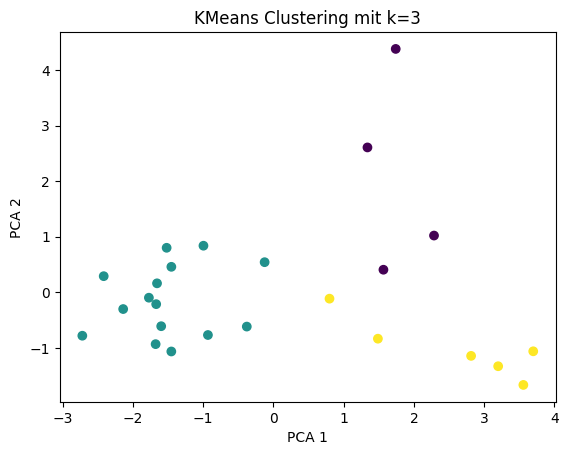

In [18]:
#PCA visualisieren
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=best_model.labels_)
plt.title(f"KMeans Clustering mit k={best_k}")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram


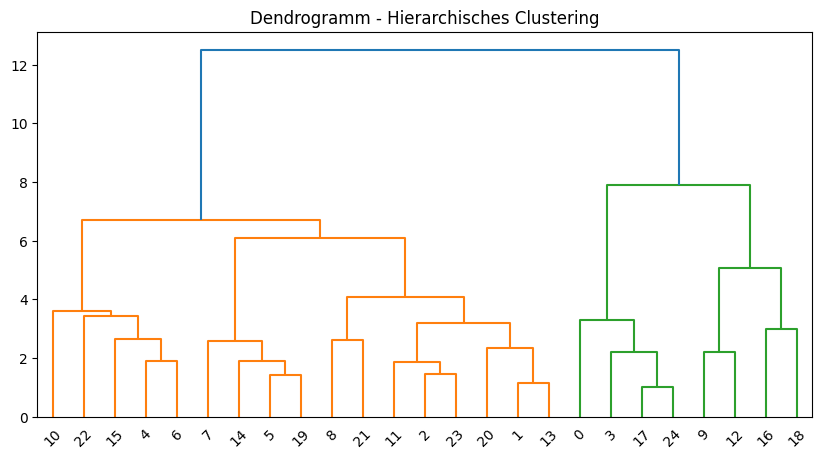

In [20]:
#Hierarchisches Clustering
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogramm - Hierarchisches Clustering")
plt.show()

In [21]:
import seaborn as sns

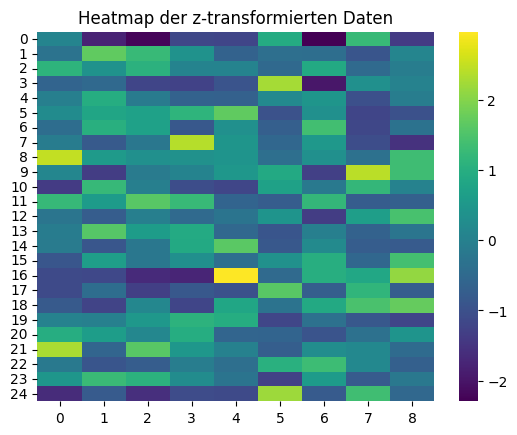

In [22]:
# Heatmap 
sns.heatmap(scaled_data, cmap="viridis")
plt.title("Heatmap der z-transformierten Daten")
plt.show()

In [23]:
from sklearn.cluster import DBSCAN


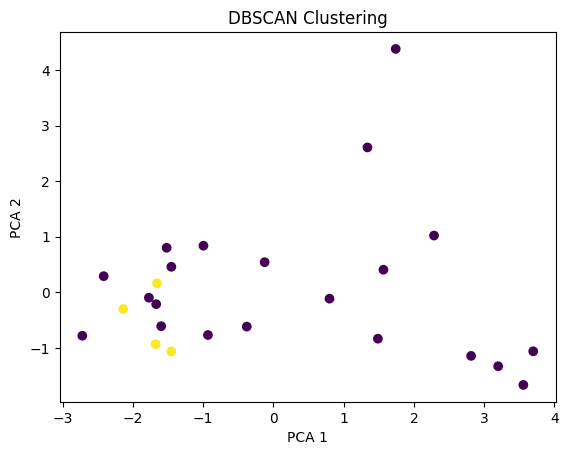

In [24]:
# DBSCAN
db = DBSCAN(eps=1.5, min_samples=3).fit(scaled_data)
labels = db.labels_

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels)
plt.title("DBSCAN Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()